In [1]:
!pip install opencv-python


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [7]:
!ls /content/drive/MyDrive


 20240529_181623.jpg
 303Mendoza_AA.pdf
 9401100-2223.rtf.gdoc
 airports.csv
'Colab Notebooks'
'Contact Information.gform'
'Copy of EQ Gothic Fiction Digital Choice Board {Mud and Ink Teaching}.gslides'
'Copy of EQ Gothic Fiction Digital Choice Board - Student Responses.gform'
'Copy of MagicSchool Level 1 Certificate (MAKE A COPY).pdf'
'Copy of MagicSchool Level 2 Certificate (MAKE A COPY).gslides'
'Copy of MagicSchool Level 3 Certificate (MAKE A COPY).gslides'
 fer2013_model.h5
'Five Star'
 flights.csv
'MagicSchool Level 1 Certificate (MAKE A COPY).gdoc'
'MagicSchool Level 1 Certificate (MAKE A COPY).pdf'
 Media
'PAL Ana Ortiz & Andres Velasco.pdf'
'Red Roses #2.gform'
'Red Roses.gform'
 Screencastify
'Thesis and Evidence Graphic Organizer.docx'
'TpT Purchases'
'Untitled form.gform'
'Untitled presentation.gslides'


In [12]:
!pip install kaggle


In [13]:
from google.colab import files
files.upload()  # This will open a file picker where you can upload the downloaded kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anaortiz12","key":"8b8245385a899982ea2efab366ab874e"}'}

In [14]:
# Make a directory for the Kaggle configuration
!mkdir -p ~/.kaggle

# Copy the uploaded kaggle.json to this new directory
!cp kaggle.json ~/.kaggle/

# Set permissions to ensure the file is readable and secure
!chmod 600 ~/.kaggle/kaggle.json


In [15]:
!ls ~/.kaggle


kaggle.json


In [16]:
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 88% 53.0M/60.3M [00:00<00:00, 130MB/s]
100% 60.3M/60.3M [00:00<00:00, 112MB/s]


In [17]:
!unzip fer2013.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [18]:
!ls


drive  fer2013.zip  kaggle.json  sample_data  test  train


In [19]:
!ls train
!ls test


angry  disgust	fear  happy  neutral  sad  surprise
angry  disgust	fear  happy  neutral  sad  surprise


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values to [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training images from the 'train' folder
train_generator = train_datagen.flow_from_directory(
    'train',  # Path to the train folder
    target_size=(48, 48),  # Resize images to 48x48
    batch_size=64,  # Adjust based on your hardware
    color_mode='grayscale',  # Grayscale images
    class_mode='categorical'  # Categorical labels (for multi-class classification)
)

# Load test images from the 'test' folder
test_generator = test_datagen.flow_from_directory(
    'test',  # Path to the test folder
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [23]:
!pip install --upgrade tensorflow


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (7 classes for the 7 emotions)
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 619,015 (2.36 MB)

 Trainable params: 619,015 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train the model using the data generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your needs (10-25 epochs is a good starting point)
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 109s 237ms/step - accuracy: 0.2635 - loss: 1.7947 - val_accuracy: 0.4026 - val_loss: 1.5329
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.3594 - loss: 1.5790 - val_accuracy: 0.5000 - val_loss: 1.5250
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 106s 237ms/step - accuracy: 0.4245 - loss: 1.5006 - val_accuracy: 0.4746 - val_loss: 1.3708
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 0.4219 - loss: 1.3907 - val_accuracy: 0.3000 - val_loss: 1.9654
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 142s 239ms/step - accuracy: 0.4791 - loss: 1.3642 - val_accuracy: 0.5013 - val_loss: 1.2954
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.5625 - loss: 1.1915 - val_accuracy: 0.3000 - val_loss: 1.3818
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 106s 237ms/step - accuracy: 0.5087 - loss: 1.2956 - val_accuracy: 0.5257 - val_loss: 1.2406
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.4844 - loss: 1.3281 - val_accuracy: 0.6000 - val_loss: 1.0117
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 142s 239ms/step - accuracy: 0.5333 - loss: 1.2293 - val_accuracy: 0.5406 - val_loss: 1.2099
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.5000 - loss: 1.4070 - val_ac

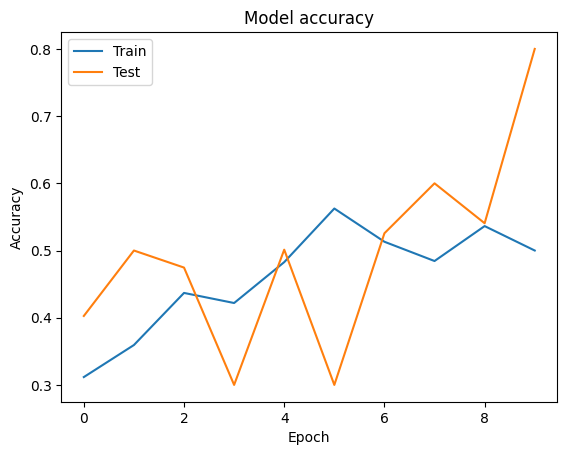

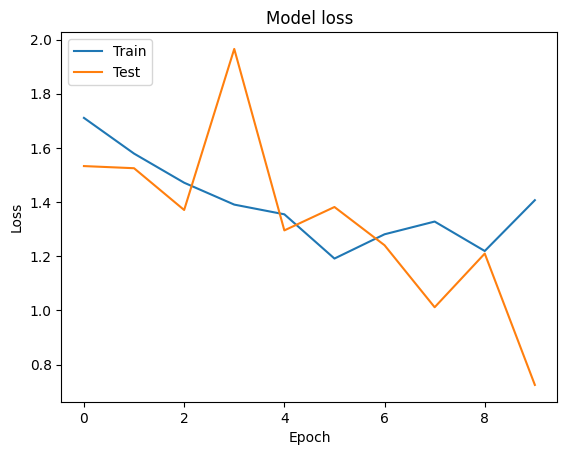

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [27]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.5400 - loss: 1.2074
Test accuracy: 0.5441626906394958


In [30]:
model.save('emotion_detection_model.keras')
